In [1]:
######################################
########## DATA PREPARATION ##########
######################################

import numpy as np
import matplotlib.pyplot as plt

"""Script to download the 20 newsgroups text classification set"""
from sklearn.datasets import fetch_20newsgroups

########## TRAIN DATA ##############
# categories = ['alt.atheism' , 'soc.religion.christian' , 'comp.graphics' , 'sci.med'] # to match tutorial
twenty_train = fetch_20newsgroups(subset = 'train', remove=(['headers', 'footers', 'quotes']))
# twenty_train = fetch_20newsgroups(subset = 'train', categories=categories)

########## TEST DATA ##############
twenty_test = fetch_20newsgroups(subset = 'test', remove=(['headers', 'footers', 'quotes']))

"""Define count vectorizer and tf-idf transformations"""

###### Count Vectorizer #######
from sklearn.feature_extraction.text import CountVectorizer
### Filter out these stopwords ####
stopwords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
#### Filter: Stopwords, token_pattern filters out the non-letter characters
count_vect = CountVectorizer(analyzer='word', stop_words = stopwords,  token_pattern = r'\b[^\d\W_/]+\b')

########## TFIDF ############
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=True,smooth_idf=True) # turned on idf and smooth idf


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


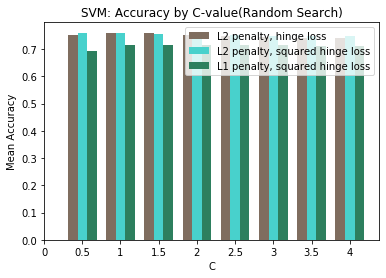

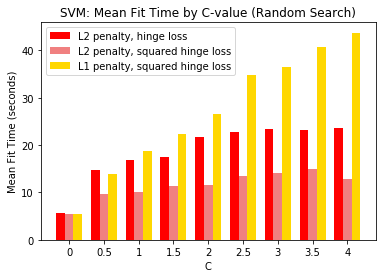

L2 penalty, hinge loss, best C: 1
L2 penalty, hinge loss, best score: 0.7596791189367416
Test accuracy of SVM (L2, hinge) with best params: 0.6950345193839618
L2 penalty, squared hinge loss, best C: 0.5
L2 penalty, squared hinge loss, best score: 0.7604743279130345
Test accuracy of SVM (L2, squared hinge) with best params: 0.6959638874137015
L1 penalty, squared hinge loss, best C: 1.5
L1 penalty, squared hinge loss, best score: 0.7159276611057128
Test accuracy of SVM (L1, squared hinge) with best params: 0.66064790228359


<Figure size 432x288 with 0 Axes>

In [0]:
#################################################
### SVM: Varying C, Penalty & Loss (Bar Plot) ###
#################################################

# packages
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV # GridSearchCV took too long
import os

clf_C = [0.5,1,1.5,2,2.5,3,3.5,4]

if not os.path.exists('SVM'):
  os.makedirs('SVM')
svm_clf = LinearSVC()
SVM_pipeline = Pipeline([('vect', count_vect), ('tfidf', tfidf_transformer), ('clf', svm_clf)])

# 1: Penalty = l2, Loss = hinge
svm_params_1 = {'clf__penalty': ['l2'], 'clf__loss': ['hinge'], 'clf__max_iter': [10000], 'clf__C': clf_C} # smaller C <=> stronger regularization
SVM_CV_1 = RandomizedSearchCV(SVM_pipeline, svm_params_1, cv=5, n_jobs=4) # 5-fold cross-val
SVM_CV_1.fit(twenty_train.data, twenty_train.target)

# 2: Penalty = l2, Loss = squared hinge
svm_params_2 = {'clf__penalty': ['l2'], 'clf__loss': ['squared_hinge'], 'clf__max_iter': [10000], 'clf__C': clf_C} # smaller C <=> stronger regularization
SVM_CV_2 = RandomizedSearchCV(SVM_pipeline, svm_params_2, cv=5, n_jobs=4) # 5-fold cross-val
SVM_CV_2.fit(twenty_train.data, twenty_train.target)

# 3: Penalty = l1, Loss = squared hinge;
svm_params_3 = {'clf__penalty': ['l1'], 'clf__loss': ['squared_hinge'], 'clf__dual':[False], 'clf__max_iter': [10000], 'clf__C': clf_C} # smaller C <=> stronger regularization
SVM_CV_3 = RandomizedSearchCV(SVM_pipeline, svm_params_3, cv=5, n_jobs=4) # 5-fold cross-val
SVM_CV_3.fit(twenty_train.data, twenty_train.target)

# graph
labels = SVM_CV_1.cv_results_.get('param_clf__C')
means_1 = SVM_CV_1.cv_results_.get('mean_test_score')
time_1 = SVM_CV_1.cv_results_.get('mean_fit_time')
means_2 = SVM_CV_2.cv_results_.get('mean_test_score')
time_2 = SVM_CV_2.cv_results_.get('mean_fit_time')
means_3 = SVM_CV_3.cv_results_.get('mean_test_score')
time_3 = SVM_CV_3.cv_results_.get('mean_fit_time')

fig, ax = plt.subplots()
barWidth = 0.25
r1 = np.arange(len(means_1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

rects1 = plt.bar(r1, means_1, color='#7f6d5f', width=barWidth, label='L2 penalty, hinge loss')
rects2 = plt.bar(r2, means_2, color='mediumturquoise', width=barWidth, label='L2 penalty, squared hinge loss')
rects3 = plt.bar(r3, means_3, color='#2d7f5e',width=barWidth, label='L1 penalty, squared hinge loss')

plt.xlabel("C")
plt.ylabel("Mean Accuracy")
plt.title('SVM: Accuracy by C-value(Random Search)')
plt.xticks([r  + barWidth for r in range(len(means_1))], labels)
plt.legend()
plt.show()
plt.savefig("SVM/newsgroup_accuracy_bar_plot.png")

rects11 = plt.bar(r1, time_1, color='red', width=barWidth, label='L2 penalty, hinge loss')
rects22 = plt.bar(r2, time_2, color='lightcoral', width=barWidth, label='L2 penalty, squared hinge loss')
rects33 = plt.bar(r3, time_3, color='gold',width=barWidth, label='L1 penalty, squared hinge loss')

plt.xlabel("C")
plt.ylabel("Mean Fit Time (seconds)")
plt.title('SVM: Mean Fit Time by C-value (Random Search)')
plt.xticks([r  + barWidth for r in range(len(time_1))], labels)
plt.legend()
plt.show()
plt.savefig("SVM/newsgroup_fit_time_bar_plot.png")

print("L2 penalty, hinge loss, best C: "+ str(SVM_CV_1.best_params_['clf__C']))
print("L2 penalty, hinge loss, best score: "+ str(SVM_CV_1.best_score_))
print("Test accuracy of SVM (L2, hinge) with best params: " + str(SVM_CV_1.best_estimator_.score(twenty_test.data, twenty_test.target)))

print("L2 penalty, squared hinge loss, best C: "+ str(SVM_CV_2.best_params_['clf__C']))
print("L2 penalty, squared hinge loss, best score: "+ str(SVM_CV_2.best_score_))
print("Test accuracy of SVM (L2, squared hinge) with best params: " + str(SVM_CV_2.best_estimator_.score(twenty_test.data, twenty_test.target)))

print("L1 penalty, squared hinge loss, best C: "+ str(SVM_CV_3.best_params_['clf__C']))
print("L1 penalty, squared hinge loss, best score: "+ str(SVM_CV_3.best_score_))
print("Test accuracy of SVM (L1, squared hinge) with best params: " + str(SVM_CV_3.best_estimator_.score(twenty_test.data, twenty_test.target)))

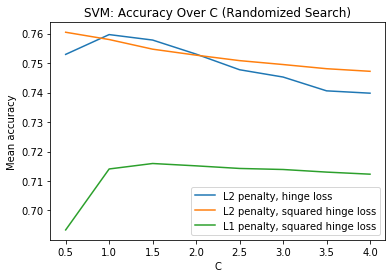

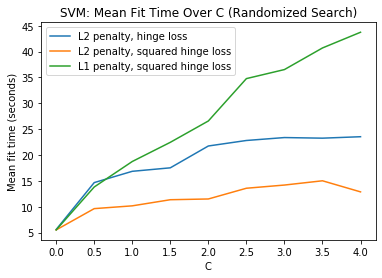

In [0]:
#################################################
### SVM: Varying C, Penalty & Loss (2nd Plot) ###
#################################################

plt.plot(list(SVM_CV_1.cv_results_.get('param_clf__C')), SVM_CV_1.cv_results_.get('mean_test_score'), label = 'L2 penalty, hinge loss')
plt.plot(list(SVM_CV_2.cv_results_.get('param_clf__C')), SVM_CV_2.cv_results_.get('mean_test_score'),label = 'L2 penalty, squared hinge loss')
plt.plot(list(SVM_CV_2.cv_results_.get('param_clf__C')), SVM_CV_3.cv_results_.get('mean_test_score'),label = 'L1 penalty, squared hinge loss')

plt.xlabel("C")
plt.ylabel("Mean accuracy")
plt.title("SVM: Accuracy Over C (Randomized Search)")
plt.legend()
plt.savefig("SVM/newsgroup_accuracy.png")
plt.show()

plt.plot(list(SVM_CV_1.cv_results_.get('param_clf__C')), SVM_CV_1.cv_results_.get('mean_fit_time'), label = 'L2 penalty, hinge loss')
plt.plot(list(SVM_CV_2.cv_results_.get('param_clf__C')), SVM_CV_2.cv_results_.get('mean_fit_time'),label = 'L2 penalty, squared hinge loss')
plt.plot(list(SVM_CV_2.cv_results_.get('param_clf__C')), SVM_CV_3.cv_results_.get('mean_fit_time'),label = 'L1 penalty, squared hinge loss')
plt.xlabel("C")
plt.ylabel("Mean fit time (seconds)")
plt.title("SVM: Mean Fit Time Over C (Randomized Search)")
plt.legend()
plt.savefig("SVM/newsgroup_time.png")
plt.show()